# 02-01: Analisi distribuzione custom

**1. Consideriamo dei componenti meccanici delicati che hanno tempi di vita casuali con distribuzione a due parametri $a>0$, $b>0$, che segue questa formula:**

$$F(t)=P(T \le t) = 1 - e^{(-at^2-bt)}$$

**1.1 Generare un campione con questa legge, con $a=0.01$ e $b=0.01$, tracciarne la densità e stimare media e deviazione standard al $95\%$ di confidenza. Stimare anche la mediana puntualmente.**

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
a = 0.01
b = 0.01

f = lambda t: 1 - np.exp(-a * (t**2) -b * t)

In [28]:
n_samples = 1000

x = np.linspace(1,20, n_samples)
samples = f(x)

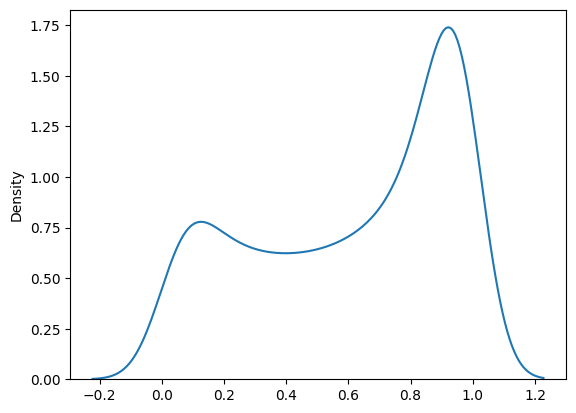

In [29]:
sns.kdeplot(samples)
plt.show()

## Stima della media con IC

In [31]:
from scipy.stats import t
import numpy as np

conf = 0.95
alpha = 1 - conf

n = len(samples)
mean = np.mean(samples)
s = np.std(samples, ddof=1)          # deviazione standard campionaria
df = n - 1

q = t.ppf(1 - alpha/2, df)     # quantile critico t

margin = q * s / np.sqrt(n)

ci_low  = mean - margin
ci_high = mean + margin

print(f"IC {conf:.0%} per la media: [{ci_low:.6f}, {ci_high:.6f}]")

IC 95% per la media: [0.592625, 0.632559]


In [33]:
from scipy.stats import chi2
import numpy as np

conf = 0.95
alpha = 1 - conf

n = len(samples)
s2 = np.var(samples, ddof=1)          # varianza campionaria
df = n - 1

q_low  = chi2.ppf(alpha/2, df)        # quantile basso
q_high = chi2.ppf(1 - alpha/2, df)    # quantile alto

ci_low  = df * s2 / q_high
ci_high = df * s2 / q_low

print(f"IC {conf:.0%} per la varianza: [{ci_low:.6f}, {ci_high:.6f}]")
print(f"IC {conf:.0%} per la std: [{np.sqrt(ci_low):.6f}, {np.sqrt(ci_high):.6f}]")

IC 95% per la varianza: [0.095024, 0.113251]
IC 95% per la std: [0.308260, 0.336528]


## Calcolo della mediana

In [35]:
median = np.median(samples)
print(f"Median: {median}")

Median: 0.7010559108495505


**1.2 Calcolare gli stimatori MLE di a e b per questa distribuzione, a partire dal campione qui a fianco.**